In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()

Saving haberman.csv to haberman.csv


{'haberman.csv': b'30,64,1,1\n30,62,3,1\n30,65,0,1\n31,59,2,1\n31,65,4,1\n33,58,10,1\n33,60,0,1\n34,59,0,2\n34,66,9,2\n34,58,30,1\n34,60,1,1\n34,61,10,1\n34,67,7,1\n34,60,0,1\n35,64,13,1\n35,63,0,1\n36,60,1,1\n36,69,0,1\n37,60,0,1\n37,63,0,1\n37,58,0,1\n37,59,6,1\n37,60,15,1\n37,63,0,1\n38,69,21,2\n38,59,2,1\n38,60,0,1\n38,60,0,1\n38,62,3,1\n38,64,1,1\n38,66,0,1\n38,66,11,1\n38,60,1,1\n38,67,5,1\n39,66,0,2\n39,63,0,1\n39,67,0,1\n39,58,0,1\n39,59,2,1\n39,63,4,1\n40,58,2,1\n40,58,0,1\n40,65,0,1\n41,60,23,2\n41,64,0,2\n41,67,0,2\n41,58,0,1\n41,59,8,1\n41,59,0,1\n41,64,0,1\n41,69,8,1\n41,65,0,1\n41,65,0,1\n42,69,1,2\n42,59,0,2\n42,58,0,1\n42,60,1,1\n42,59,2,1\n42,61,4,1\n42,62,20,1\n42,65,0,1\n42,63,1,1\n43,58,52,2\n43,59,2,2\n43,64,0,2\n43,64,0,2\n43,63,14,1\n43,64,2,1\n43,64,3,1\n43,60,0,1\n43,63,2,1\n43,65,0,1\n43,66,4,1\n44,64,6,2\n44,58,9,2\n44,63,19,2\n44,61,0,1\n44,63,1,1\n44,61,0,1\n44,67,16,1\n45,65,6,2\n45,66,0,2\n45,67,1,2\n45,60,0,1\n45,67,0,1\n45,59,14,1\n45,64,0,1\n45,68,0,1\

In [4]:
hbman = pd.read_csv('haberman.csv')

In [5]:
hbman.shape

(305, 4)

In [6]:
hbman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [7]:
hbman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Our dataset is without Columns so we have to add column names.

In [8]:
hbman = pd.read_csv('haberman.csv',names=['age','op_year','axil_nodes','survival_status'])

In [9]:
hbman.head()

,age,op_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
hbman.shape

(306, 4)

In [11]:
hbman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   op_year          306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Our dataset don't have any null value.
All four columns are numerical values.

In [12]:
hbman.describe(include='all')

,age,op_year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Difference between mean and median for 'axil_nodes' is significantly high so there may be some outliers.

(array([236.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

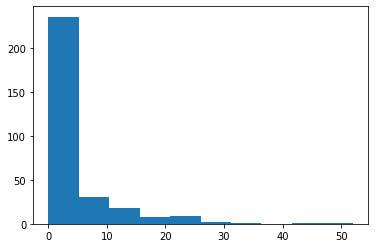

In [13]:
plt.hist(hbman['axil_nodes'])

Looks like very few values after 30

In [14]:
hbman.nlargest(10,'axil_nodes')

,age,op_year,axil_nodes,survival_status
62,43,58,52,2
174,54,67,46,1
215,59,62,35,2
9,34,58,30,1
252,63,61,28,1
227,60,61,25,1
160,53,63,24,2
43,41,60,23,2
96,47,63,23,2
168,54,65,23,2


Only two values for 'axil_nodes' greater than 35 so we can replace these two with median value.
But not much gap to other values so no need to replace them.

Our main features are 'age' and 'axil_nodes' which also helps us in finding our result i.e. survival status.

(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

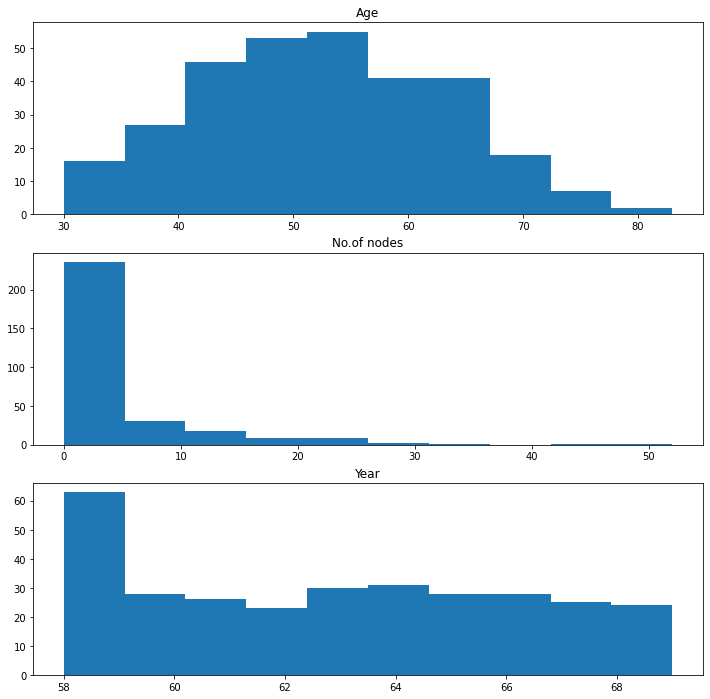

In [15]:
figure,axes = plt.subplots(3,1,figsize=(12,12))
axes[0].set_title('Age')
axes[0].hist(hbman['age'],bins=10)

axes[1].set_title('No.of nodes')
axes[1].hist(hbman['axil_nodes'],bins=10)

axes[2].set_title('Year')
axes[2].hist(hbman['op_year'],bins=10)

Age varies from 30 to 80 years old.

Number of active nodes range from 0 to 56

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


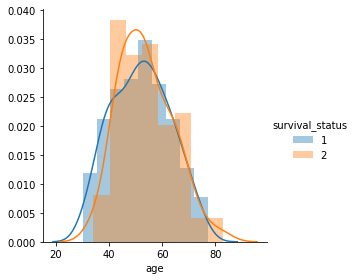

In [16]:
sns.FacetGrid(hbman,hue='survival_status',height=4).map(sns.distplot,'age').add_legend()
plt.show()

Graphs for long survival and short survival is overlapping each other for approximately all age group. So we can not conclude anything from this graph.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


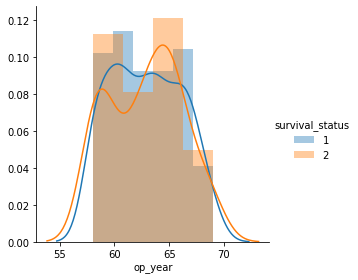

In [17]:
sns.FacetGrid(hbman,hue='survival_status',height=4).map(sns.distplot,'op_year').add_legend()

Here also graph is perfectly overlapping.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


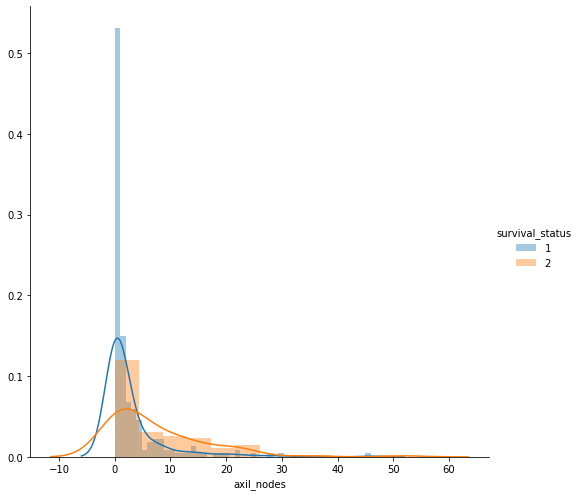

In [18]:
sns.FacetGrid(hbman,hue='survival_status',height=7).map(sns.distplot,'axil_nodes').add_legend()


If no. of active nodes is less than 5 then high possibility of survival.

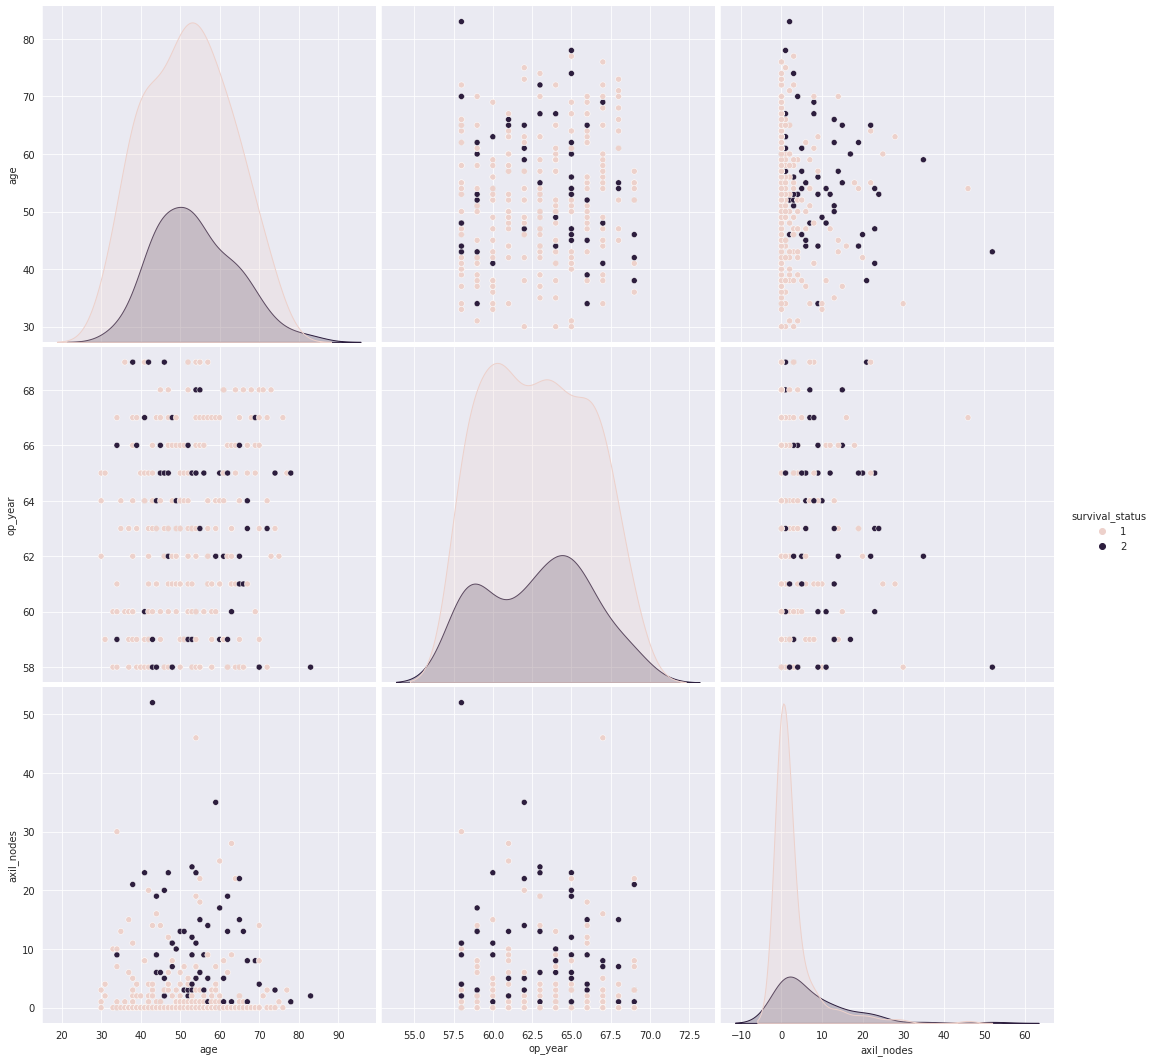

In [19]:
sns.set_style('darkgrid')
sns.pairplot(hbman,hue='survival_status',height=5)

In [20]:
long_survival = hbman[hbman['survival_status']==1]
short_survival = hbman[hbman['survival_status']==2]


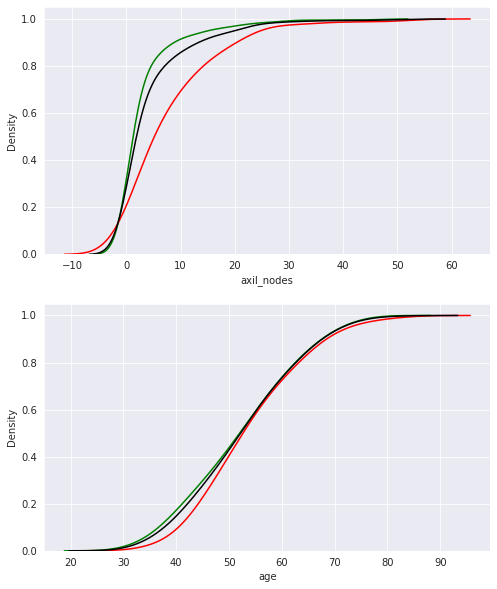

In [25]:
fig,axes = plt.subplots(2,1,figsize=(8,10))
sns.kdeplot(data=long_survival,x='axil_nodes',cumulative=True,ax=axes[0],color='green')
sns.kdeplot(data=short_survival,x='axil_nodes',cumulative=True,ax=axes[0],color='red')
sns.kdeplot(data=hbman,x='axil_nodes',cumulative=True,ax=axes[0],color='black')

sns.kdeplot(data=long_survival,x='age',cumulative=True,ax=axes[1],color='green')
sns.kdeplot(data=short_survival,x='age',cumulative=True,ax=axes[1],color='red')
sns.kdeplot(data=hbman,x='age',cumulative=True,ax=axes[1],color='black')

Here red CDF is for short survival and green CDF is for long survival.

From above CDFs we can clearly see that around 80% people with less than 10 positive axil nodes survives more than 5 years and more than 70% of short surviving people have less than 10 positive lymphe nodes. Overall 80% people have less than 10 positive lymph nodes.

Above 65% people of both long and short survival are below 60 year old.